In [1]:
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Shape of dataset (rows, columns)
print("Shape:", df.shape)

# Preview first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Shape: (303, 14)

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Summary statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303

Target value counts:
target
1    165
0    138
Name: count, dtype: int64


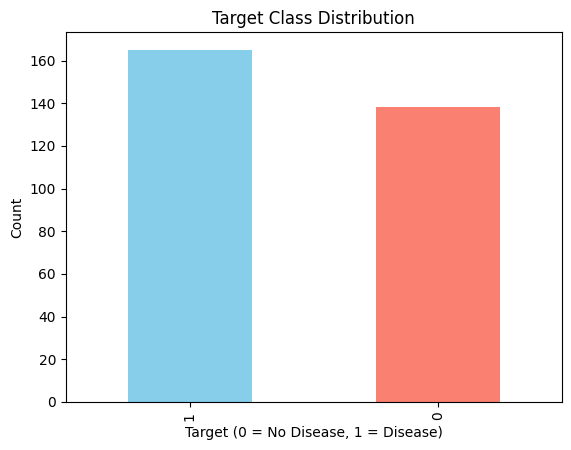

In [3]:
import matplotlib.pyplot as plt

# Count values of target column
print("Target value counts:")
print(df['target'].value_counts())

# Bar plot of target distribution
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Target Class Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()



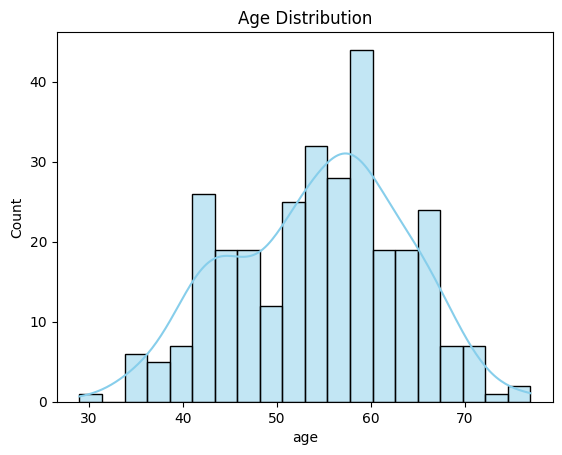

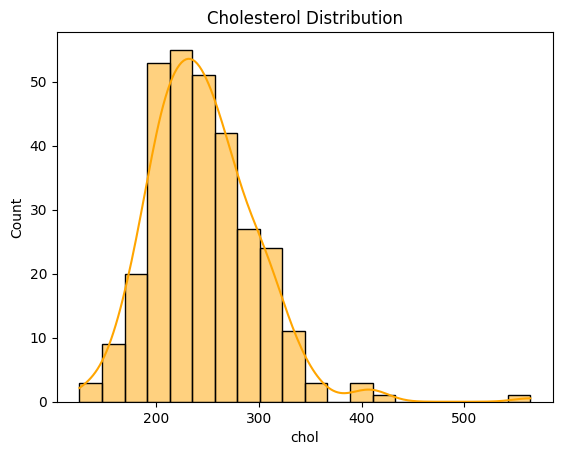

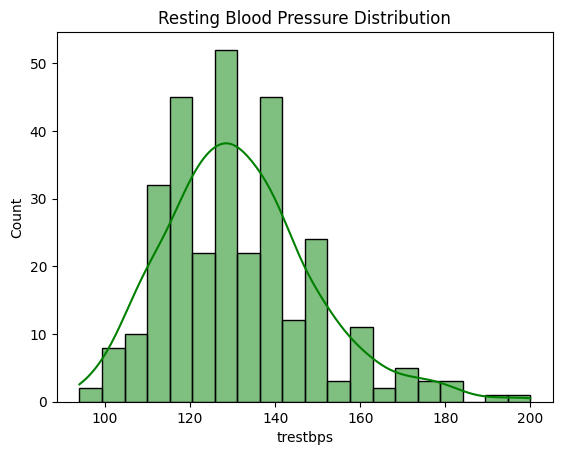

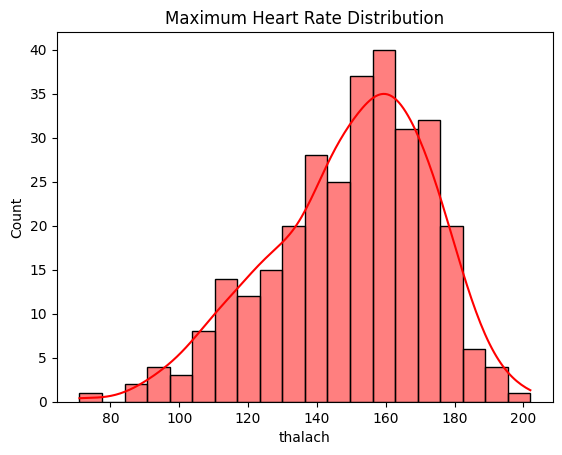

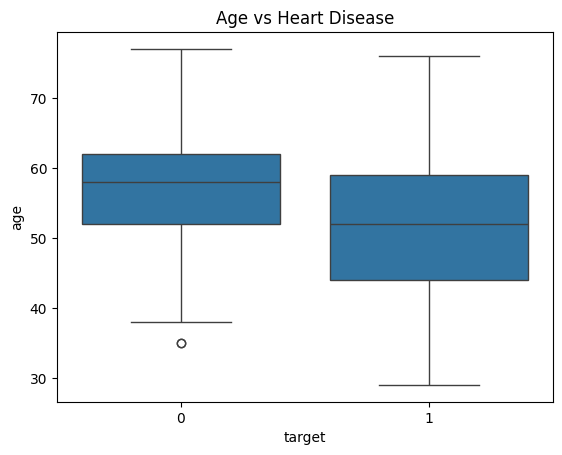

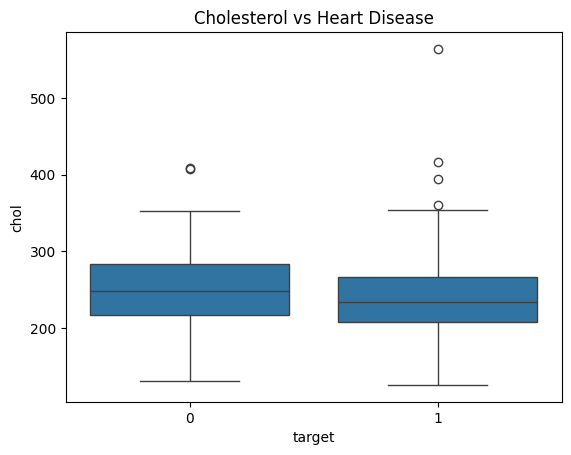

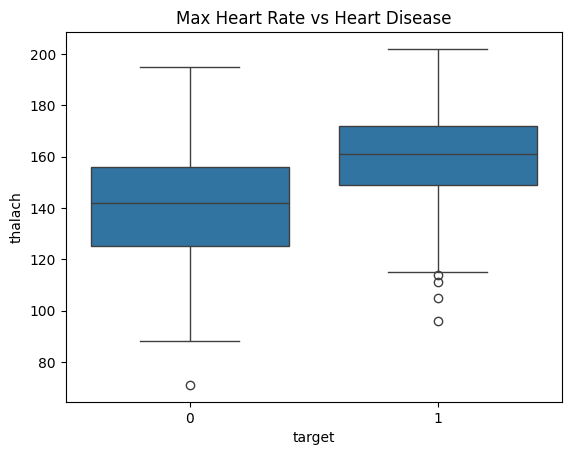

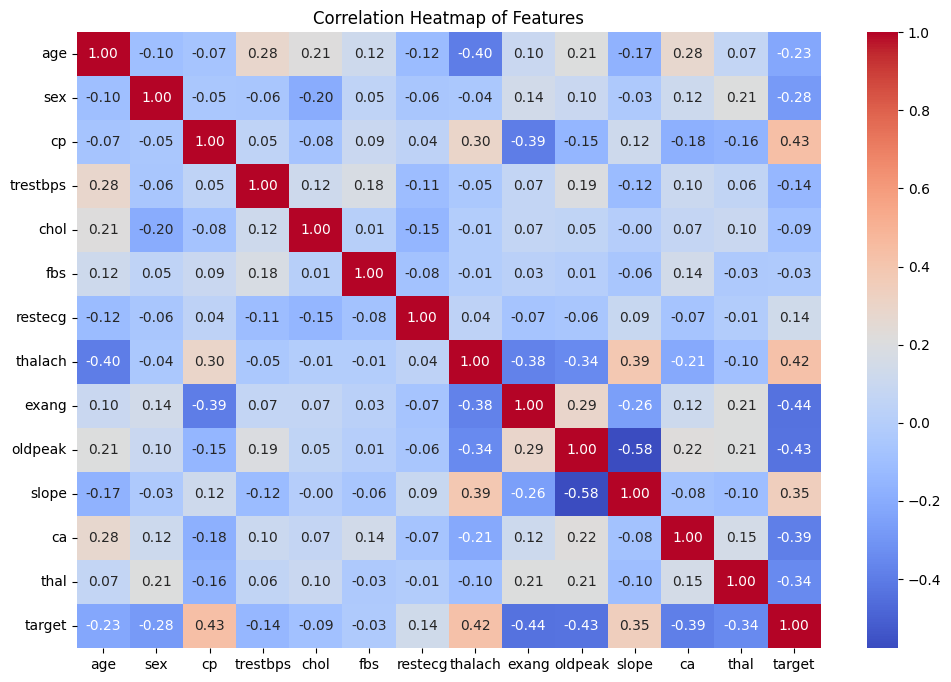

In [4]:
import seaborn as sns

# 1. Age Distribution
sns.histplot(df['age'], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

# 2. Cholesterol Distribution
sns.histplot(df['chol'], bins=20, kde=True, color="orange")
plt.title("Cholesterol Distribution")
plt.show()

# 3. Resting Blood Pressure Distribution
sns.histplot(df['trestbps'], bins=20, kde=True, color="green")
plt.title("Resting Blood Pressure Distribution")
plt.show()

# 4. Max Heart Rate Distribution
sns.histplot(df['thalach'], bins=20, kde=True, color="red")
plt.title("Maximum Heart Rate Distribution")
plt.show()

# 5. Age vs Heart Disease
sns.boxplot(x="target", y="age", data=df)
plt.title("Age vs Heart Disease")
plt.show()

# 6. Cholesterol vs Heart Disease
sns.boxplot(x="target", y="chol", data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()

# 7. Max HR vs Heart Disease
sns.boxplot(x="target", y="thalach", data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()

# 8. Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split into features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

# 2. Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# 3. Scale features (Logistic Regression, SVM need this)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train shape: (242, 13) Test shape: (61, 13)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 1. Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# 2. Train on training data (scaled)
log_reg.fit(X_train_scaled, y_train)

# 3. Predict on test data
y_pred = log_reg.predict(X_test_scaled)

# 4. Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Accuracy: 0.8032786885245902

Confusion Matrix:
 [[19  9]
 [ 3 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

ROC-AUC Score: 0.7938311688311689


Accuracy: 0.8360655737704918

Confusion Matrix:
 [[19  9]
 [ 1 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61

ROC-AUC Score: 0.8241341991341993


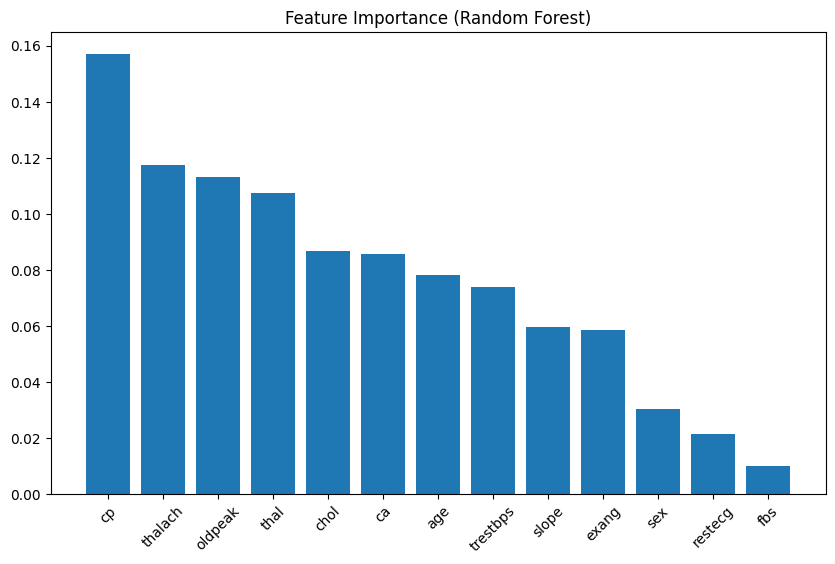

In [7]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train on training data (no scaling needed for trees)
rf_model.fit(X_train, y_train)

# 3. Predict on test data
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))

# 5. Feature Importance
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.title("Feature Importance (Random Forest)")
plt.show()


                 Model  Accuracy  F1 Score
0  Logistic Regression  0.803279  0.833333
1        Random Forest  0.836066  0.864865
2                  SVM  0.819672  0.849315


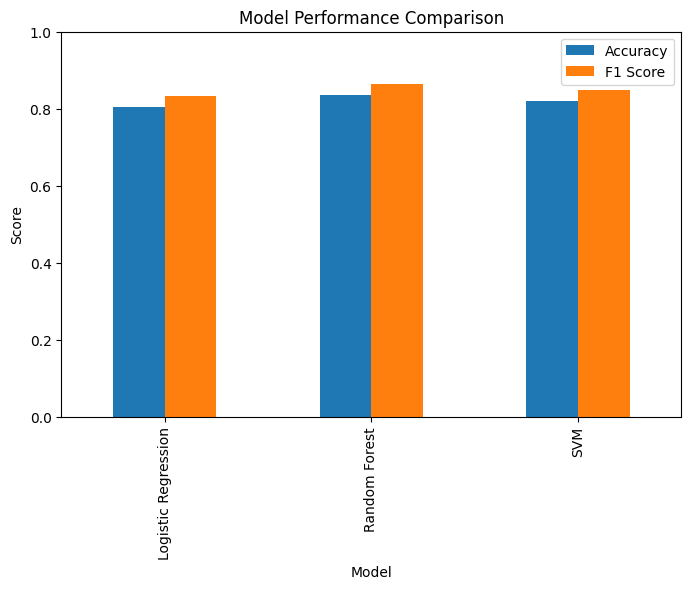

In [8]:
from sklearn.svm import SVC

# 1. Train an SVM (requires scaled data)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# 2. Collect models and predictions
models = {
    "Logistic Regression": (y_test, y_pred),
    "Random Forest": (y_test, y_pred_rf),
    "SVM": (y_test, y_pred_svm)
}

from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

results = []
for name, (y_true, y_hat) in models.items():
    acc = accuracy_score(y_true, y_hat)
    f1 = f1_score(y_true, y_hat)
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)

# 3. Plot comparison
results_df.set_index("Model").plot(kind="bar", figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()


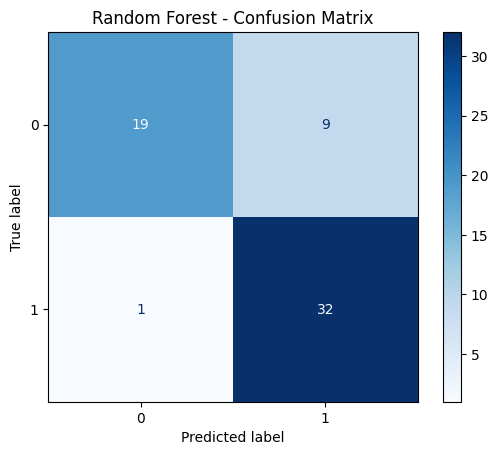

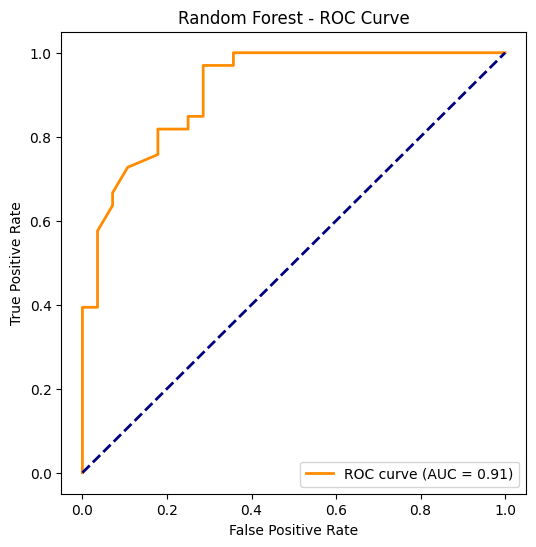

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Pick the best model (use rf_model if Random Forest was best)
best_model = rf_model
best_model_name = "Random Forest"

# 1. Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap="Blues")
disp.ax_.set_title(f"{best_model_name} - Confusion Matrix")
plt.show()

# 2. ROC Curve
if hasattr(best_model, "predict_proba"):
    y_probs = best_model.predict_proba(X_test)[:,1]
else:
    y_probs = best_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{best_model_name} - ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [10]:
import joblib

# Save Random Forest model to a file
joblib.dump(rf_model, "heart_model.pkl")

print("✅ Model saved as heart_model.pkl")


✅ Model saved as heart_model.pkl
